## Załadujmy dane ze zbioru titanic
Zbiór Titanic został udostępniony na stronie [openml.org](https://www.openml.org/search?type=data&sort=runs&id=40945&status=active) w dwóch formatach: [arff (Attribute-Relation File Format)](https://www.cs.waikato.ac.nz/~ml/weka/arff.html) oraz [parquet](https://parquet.apache.org/)

Wczytanie pliku `parquet` wymaga zainstalowanej paczki [`pyarrow`](https://pypi.org/project/pyarrow/) lub [`fastparquet`](https://pypi.org/project/fastparquet/). Wczytanie  przy użyciu `pandas.read_parquet(filename)`.

Wczytanie pliku `arff` wymaga paczki np. [`liac-arff`](https://pypi.org/project/liac-arff/). Po wczytaniu pliku można go przekazać do konstruktora podstawowej struktury danych reprezentującej tabelę w bibliotece pandas tj. [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

### ARFF

In [2]:
import arff
import pandas as pd

def load_arff_to_dataframe(path):
    # Load the ARFF file
    with open(path, 'r') as f:
        arff_data = arff.load(f)
    
    # Extract data and attribute names
    data = arff_data['data']
    column_names = [attr[0] for attr in arff_data['attributes']]
    
    # Create a DataFrame
    df = pd.DataFrame(data, columns=column_names)
    
    return df

# Example usage
path_to_arff = '../titanic/titanic.arff'
df_arff = load_arff_to_dataframe(path_to_arff)
df_arff

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,None,C,None,328.0,None
1305,3.0,0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None
1306,3.0,0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None
1307,3.0,0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None


### parquet

In [3]:
df_parquet = pd.read_parquet('../titanic/dataset_40945.pq')
df_parquet

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,None,C,None,328.0,None
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,None,C,None,NaN,None
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,None,C,None,304.0,None
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,None,C,None,NaN,None


### Dalej popracujmy z `df = df_parquet` i obejrzyjmy szczegóły tej tabeli

In [4]:
df = df_parquet

#### Wyświetlenie pierwszych wierszy danych
print(df.head())

   pclass survived                                             name     sex  \
0       1        1                    Allen, Miss. Elisabeth Walton  female   
1       1        1                   Allison, Master. Hudson Trevor    male   
2       1        0                     Allison, Miss. Helen Loraine  female   
3       1        0             Allison, Mr. Hudson Joshua Creighton    male   
4       1        0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked  boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S     2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S    11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  None    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  None  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  None    NaN   

                         home.dest  
0                     St 

In [5]:
#### Podsumowanie informacji o danych
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   uint8   
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   uint8   
 6   parch      1309 non-null   uint8   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(3), object(5), uint8(3)
memory usage: 90.0+ KB
None


In [14]:
#### Statystyki opisowe dla danych numerycznych
print(df.describe())

            pclass          age        sibsp        parch         fare  \
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000   
mean      2.294882    29.881135     0.498854     0.385027    33.295479   
std       0.837836    14.413500     1.041658     0.865560    51.758668   
min       1.000000     0.166700     0.000000     0.000000     0.000000   
25%       2.000000    21.000000     0.000000     0.000000     7.895800   
50%       3.000000    28.000000     0.000000     0.000000    14.454200   
75%       3.000000    39.000000     1.000000     0.000000    31.275000   
max       3.000000    80.000000     8.000000     9.000000   512.329200   

             body  
count  121.000000  
mean   160.809917  
std     97.696922  
min      1.000000  
25%     72.000000  
50%    155.000000  
75%    256.000000  
max    328.000000  


In [8]:
df['survived'].value_counts(dropna=False)

survived
0    809
1    500
Name: count, dtype: int64

### można dopasować styl display:

In [3]:
pd.set_option('display.max_columns', None)  # pokaże wszystkie kolumny

In [19]:
df.head()

,pclass,...,home.dest
0,1,...,"St Louis, MO"
1,1,...,"Montreal, PQ / Chesterville, ON"
2,1,...,"Montreal, PQ / Chesterville, ON"
3,1,...,"Montreal, PQ / Chesterville, ON"
4,1,...,"Montreal, PQ / Chesterville, ON"


In [7]:
#### Sprawdzenie brakujących wartości
print(df.isna().sum())


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [8]:
#### Wyświetlenie ile jest unikalnych wartości dla kolumn
df.nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [9]:
#### Wyświetlenie unikalnych wartości dla kolumny
print(df['boat'].unique())

['2' '11' None '3' '10' 'D' '4' '9' '6' 'B' '8' 'A' '5' '7' 'C' '14' '5 9'
 '13' '1' '15' '5 7' '8 10' '12' '16' '13 15 B' 'C D' '15 16' '13 15']


## Czyszczenie danych 

In [10]:
#### Identyfikacja i usunięcie duplikatów
df = df.drop_duplicates()

In [11]:
#### Obsługa brakujących wartości
df = df.dropna(subset='fare')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,None,C,None,328.0,None
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,None,C,None,NaN,None
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,None,C,None,304.0,None
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,None,C,None,NaN,None


In [12]:
#### Przykład skalowania - MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data))
MinMaxScaler()
print(scaler.data_max_)
print(scaler.transform(data))
print(scaler.transform([[2, 2]]))

MinMaxScaler()
[ 1. 18.]
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
[[1.5 0. ]]


In [13]:
### Korekta typów danych
df.astype({'pclass': 'int32'}).dtypes

pclass          int32
survived     category
name           object
sex          category
age           float64
sibsp           uint8
parch           uint8
ticket         object
fare          float64
cabin          object
embarked     category
boat           object
body          float64
home.dest      object
dtype: object

## Graficzna wizualizacja danych
[User guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
### Demonstracja prostych wizualizacji z użyciem biblioteki [`matplotlib`](https://pypi.org/project/matplotlib/)

In [14]:
from matplotlib import pyplot as plt

/var/folders/dg/w1lj0pmn0kg4q2x6y3397nj80000gn/T/ipykernel_23199/2571847501.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['pclass', 'survived'])['name'].count().plot.bar()


<Axes: xlabel='pclass,survived'>

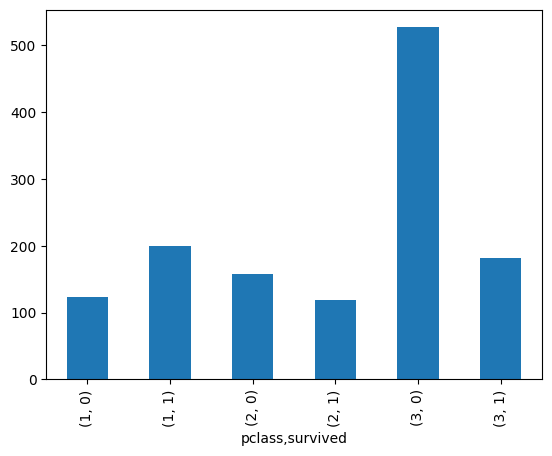

In [15]:
df.groupby(['pclass', 'survived'])['name'].count().plot.bar()